In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np


### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
df_train = pd.read_csv(path_train)
df_train['quality'] = np.where(df_train['quality'] >= 7 , 1 , 0)

finish_pipe = Pipeline([
            ('preprocessing', MinMaxScaler()), 
            ('clf',     KNeighborsClassifier(n_neighbors = 14, p = 2, weights = 'distance'))
            ])
finish_pipe.fit(df_train.drop(['quality'], axis=1), df_train['quality'])

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=14, weights='distance'))])

In [8]:
# Блок предсказания с использованием тестового набора

In [11]:
df_test = pd.read_csv(path_test)
y_predict = finish_pipe.predict(df_test)
y_predict.shape

(576,)

In [10]:
# # Название вектора предсказанных значений  y_predict полученого на основании тестового набора
# y_predict = ['best' if value else 'worst' for value in y_predict]
# display(y_predict)

['worst',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'best',
 'best',
 'worst',
 'worst',
 'best',
 'best',
 'worst',
 'best',
 'worst',
 'best',
 'best',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'best',
 'worst',
 'best',
 'worst',
 'best',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'worst',
 'worst',
 'best',
 'best',
 'best',
 'best',
 'worst',
 'best',
 'best',
 'worst',
 'worst',
 'best',
 'worst',
 'worst',
 'worst',
 'best',
 'best',
 'best',
 'worst',
 'best',
 'worst',
 'worst',
 'worst',
 'best',
 'best',
 'worst',
 'best',
 'best',
 'worst',
 'best',
 'worst',
 'best',
 'best',
 'best',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'worst',
 'best',
 'best',
 'worst',
 'worst',
 'worst',
 'worst'

0.6893203883495146

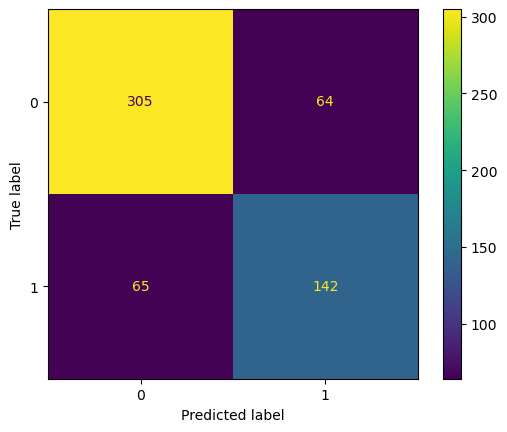

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)